In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv('C1.csv', header=None, names=['x','y'])

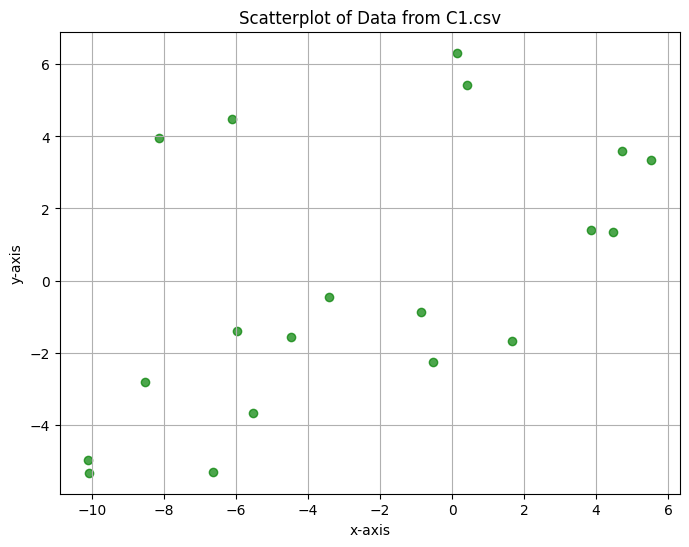

In [3]:
# QUESTION 1

plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color='green', alpha=0.7)
plt.title("Scatterplot of Data from C1.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [4]:
# single-link hierarchical clustering
# every point is a cluster
# combine the closest two clusters
#   make a dictionary of ordered pairs : distances
#   for all keys
#      if the paired points are in different clusters
#         merge the clusters
# stop when there are four cluster

clusters = set(zip(d['x'], d['y']))
distances_between_points = {}
for pair1 in clusters:
    for pair2 in clusters:
        if pair1 != pair2 and (pair2, pair1) not in distances_between_points:
            distances_between_points[(pair1, pair2)] = np.linalg.norm(np.array(pair1) - np.array(pair2))

In [5]:
def merge_clusters(distances_between_points, clusters, first_run, link):
    if link == 'single':
        #find the pair of points not in the same cluster that are closest together
        #find the max distance/point so we can count down from there
        max_distance = 0
        for pair, distance in distances_between_points.items():
            if distance > max_distance:
                max_distance = distance
                max_distance_pair = pair
    
        #set the farthest-away points as the closest points
        min_distance_so_far = max_distance
        closest_points_so_far = max_distance_pair
        
        for pair, distance in distances_between_points.items():
            same_cluster = False
            for cluster in clusters:
                if (pair[0] in cluster and pair[1] in cluster):
                    same_cluster = True
                    break
            if not same_cluster and distance < min_distance_so_far:
                min_distance_so_far = distance
                closest_points_so_far = pair
    
        distance_between_closest_clusters = min_distance_so_far
        closest_clusters_representative_points = closest_points_so_far

    if first_run:
        clusters_list = list(clusters)
        clusters_list_of_sets = []
        for i in clusters_list:
            clusters_list_of_sets.append({i})
    else:
        clusters_list_of_sets = clusters

    if link == 'complete':
        #distances_between_points is a dictionary of tuples of tuples to floats
        #clusters is a list of sets of tuples
        #output closest_clusters_representative_points, a tuple of tuples
        cluster_dists = {}
        for cluster1 in clusters_list_of_sets:
            for cluster2 in clusters_list_of_sets:
                if cluster1 != cluster2:
                    max_dist = 0
                    for point1 in cluster1:
                        for point2 in cluster2:
                            dist = np.linalg.norm(np.array(point1) - np.array(point2))
                            if dist > max_dist:
                                max_dist = dist
                                rep_point1 = point1
                                rep_point2 = point2
                    cluster_dists[(rep_point1, rep_point2)] = max_dist
        closest_clusters_representative_points = min(cluster_dists, key=cluster_dists.get)
    
    new_clusters = []
    for cluster in clusters_list_of_sets:
        if closest_clusters_representative_points[0] in cluster:
            to_merge1 = cluster
        elif closest_clusters_representative_points[1] in cluster:
            to_merge2 = cluster
        else:
            new_clusters.append(cluster)
    new_clusters.append(to_merge1.union(to_merge2))
    return(new_clusters)

In [6]:
# data must be in a pandas dataframe with x-values in the first column and y-values in the second and the headers 'x' and 'y'
def link(data, k, link):
    first_run = True
    clusters = set(zip(data['x'], data['y']))
    distances_between_points = {}
    for pair1 in clusters:
        for pair2 in clusters:
            if pair1 != pair2:
                distances_between_points[(pair1, pair2)] = np.linalg.norm(np.array(pair1) - np.array(pair2))
    
    num_clust = len(clusters)
    while num_clust != k:
        clusters = merge_clusters(distances_between_points, clusters, first_run, link)
        num_clust = len(clusters)
        first_run = False

    return(clusters)

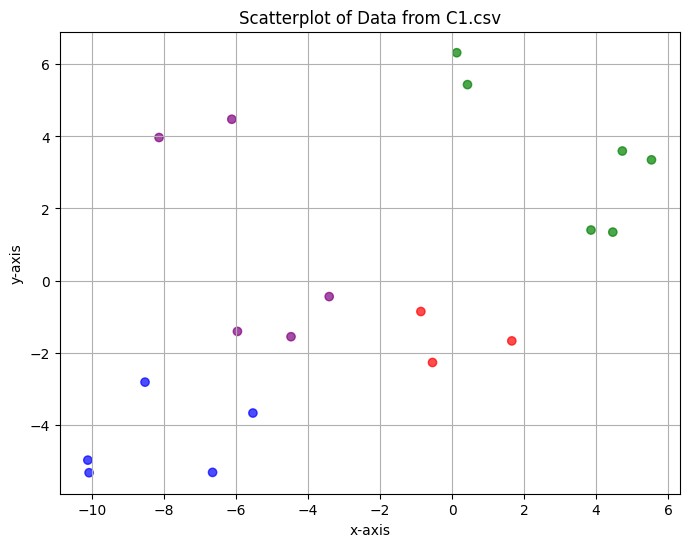

In [7]:
clusters = link(d, 4, 'complete')

colors = ['red', 'blue', 'green', 'purple']

point_colors = []
x = []
y = []

for cluster_number, cluster in enumerate(clusters):
    for point in cluster:
        x.append(point[0])
        y.append(point[1])
        point_colors.append(colors[cluster_number])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=point_colors, alpha=0.7)
plt.title("Scatterplot of Data from C1.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [8]:
# QUESTION 2

In [9]:
# PART A

d = pd.read_csv('C2.csv', header=None, names=['x','y'])

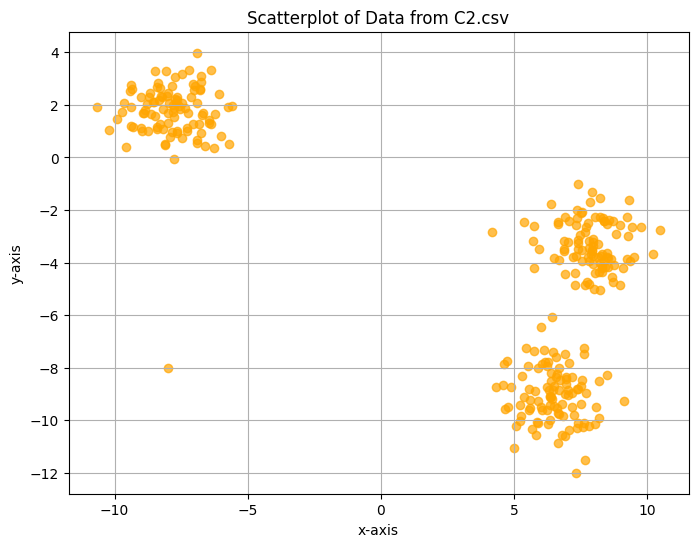

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color='orange', alpha=0.7)
plt.title("Scatterplot of Data from C2.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [11]:
def gonzalez(X, k):
    # X: Pandas dataframe of points
    # k: number of centers
    
    # Initialize the list of centers - the assignment said to use the first point in the dataset
    X = X.to_numpy()
    centers = [X[0]]
    
    # Compute distances from the first center to all points
    def distance(a, b):
        return np.linalg.norm(a - b)

    for _ in range(1, k):
        # Calculate the minimum distance to any center for each point
        min_dist = np.array([min(distance(x, c) for c in centers) for x in X])
        
        # Find the point that maximizes this minimum distance (farthest from any center)
        new_center = X[np.argmax(min_dist)]
        centers.append(new_center)

    cluster_assignments = [[np.argmin([distance(X[x], c) for c in centers])] for x in range(len(X))]
    cluster_assignments = [item[0] for item in cluster_assignments]

    centers_cost = max(min_dist)

    means_cost = np.sum(min_dist ** 2) / len(X)

    return np.array(centers), cluster_assignments, centers_cost, means_cost

In [12]:
gonzalez_centers, gonz_cluster_assignments, centers_cost, means_cost = gonzalez(d, 3) #centers gets used later, so don't change the name
print('Selected centers:\n', gonzalez_centers)
print('Centers cost: ', centers_cost)
print('Means cost: ', means_cost)

Selected centers:
 [[ -8.99419326   2.30188689]
 [  7.32325911 -12.00064379]
 [  7.38575675  -1.02379608]]
Centers cost:  10.977025619949357
Means cost:  30.768279114255368


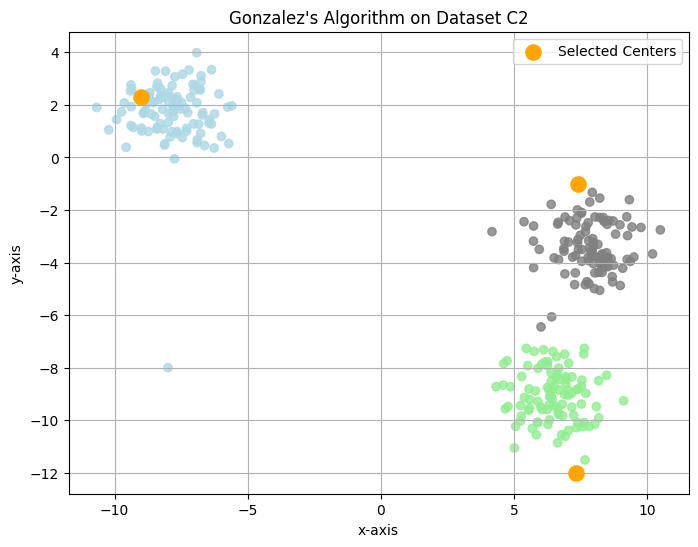

In [13]:
import matplotlib.pyplot as plt

color_map = {0: 'lightblue', 1: 'lightgreen', 2: 'grey'}
colors = [color_map[point] for point in gonz_cluster_assignments]  # map each label to its color

plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color=colors, alpha=0.8)
plt.scatter(gonzalez_centers[:, 0], gonzalez_centers[:, 1], color='orange', s=120, label='Selected Centers')
plt.title("Gonzalez's Algorithm on Dataset C2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# PART B

from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans

# Function to compute 3-means cost
def compute_cost(X, centers):
    _, dists = pairwise_distances_argmin_min(X, centers) # for each point in the first argument, finds the closest point in the second and returns the point and the distances
    return np.sum(dists ** 2)

# KMeans++ - X for data, k means, s1 for optional first cluster if you'd like to specify it
def run_kmeans_plus_plus(X, k, s1=None):
    #if first site not provided, pick one randomly from the data. Otherwise, use the provided point as the first site.
    n = X.shape[0]
    if s1 is None:
        idx = np.random.choice(n)
        s1 = X[idx]
    else:
        centers = [s1]
    
    # Choose k-1 more centers using k-means++ style sampling
    for _ in range(1, k):
        _, dists = pairwise_distances_argmin_min(X, np.array(centers))
        probs = dists ** 2
        probs /= probs.sum()
        next_idx = np.random.choice(n, p=probs) # p must be a 1-D array-like object of the same length as n for which all elements add to 1. It's the probability distribution for the random choice.
        centers.append(X[next_idx])
    
    return np.array(centers)

In [15]:
X = d[['x', 'y']].values
first_center = X[0]
num_trials = 10000

# Run trials - make sure you run the gonzalez algorithm above first so you can compare the chosen centers
costs = []
kmeans_centers_list = []
same_as_gonzalez = []
for _ in range(num_trials):
    kpp_centers = run_kmeans_plus_plus(X, k=3, s1=first_center)
    cost = compute_cost(X, kpp_centers)
    kpp_cluster_assignments, _ = pairwise_distances_argmin_min(X, np.array(kpp_centers))
    comp_with_gonzalez = np.array_equal(gonz_cluster_assignments, kpp_cluster_assignments)

    # cluster 0 will always be the same, since we've set both up to start with the first point in the dataset, but Gonzalez's 1 could be KPP's 2 and vice versa. So we have to switch the 1s and the 2s in the KPP cluster assignments and compare it to Gonzalez that way too.
    renumbered = kpp_cluster_assignments
    renumbered[renumbered == 1] = -1
    renumbered[renumbered == 2] = 1
    renumbered[renumbered == -1] = 2
    comp_with_gonzalez_alt = np.array_equal(gonz_cluster_assignments, renumbered)

    comp_with_gonzalez |= comp_with_gonzalez_alt

    costs.append(cost)
    kmeans_centers_list.append(kpp_centers)
    same_as_gonzalez.append(comp_with_gonzalez)

frac_same_as_gonzalez = sum(same_as_gonzalez)/len(same_as_gonzalez)
print(frac_same_as_gonzalez)

0.127


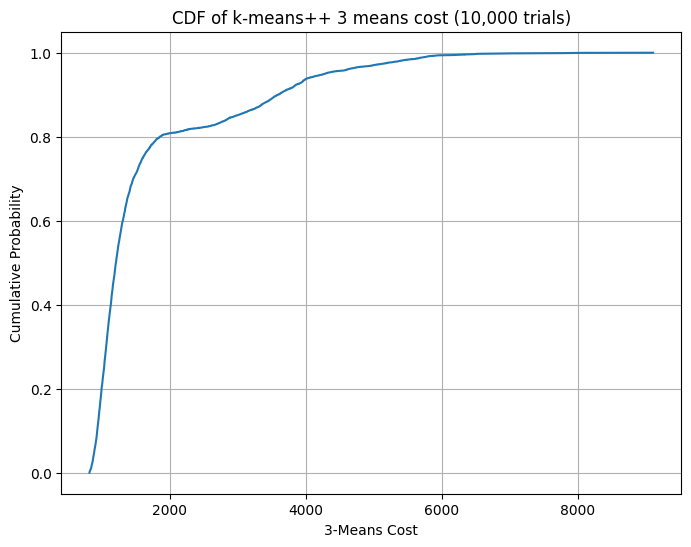

In [16]:
# Plot CDF of 3-means cost
sorted_costs = np.sort(costs)
cdf = np.arange(1, len(sorted_costs)+1) / len(sorted_costs)

plt.figure(figsize=(8, 6))
plt.plot(sorted_costs, cdf)
plt.xlabel("3-Means Cost")
plt.ylabel("Cumulative Probability")
plt.title("CDF of k-means++ 3 means cost (10,000 trials)")
plt.grid(True)
plt.show()